# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[10 18 31]
 [19 16 -1]
 [ 3 13 20]
 [ 8  2 23]
 [ 6 -1  5]]
Simplices
 [[23 26 22]
 [ 5 17 25]
 [25 15  8]
 [15 18  8]
 [ 1 19 10]]
Points
 [[[0.3460094  0.76428373]
  [0.55149491 0.87525468]
  [0.0013277  0.77444411]]

 [[0.05598402 0.59216452]
  [0.2120883  0.10417678]
  [0.22912587 0.44955589]]

 [[0.22912587 0.44955589]
  [0.44111746 0.25695592]
  [0.54209604 0.55438419]]

 [[0.44111746 0.25695592]
  [0.61828891 0.24988114]
  [0.54209604 0.55438419]]

 [[0.92675548 0.39879913]
  [0.75049469 0.15600703]
  [0.78281825 0.05803991]]]


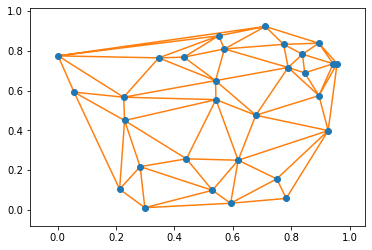

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

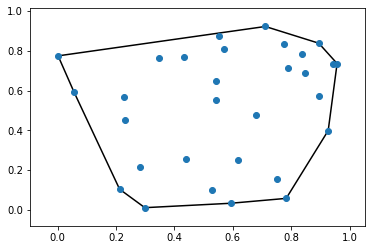

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

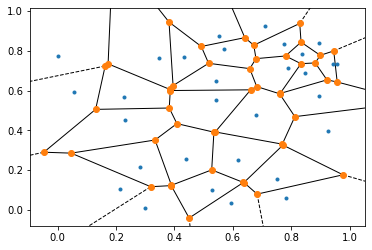

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.29851183 0.01131216]
 [0.92675548 0.39879913]
 [0.54084861 0.64997978]
 [0.71146189 0.92213236]
 [0.52998711 0.09850801]
 [0.05598402 0.59216452]
 [0.57112319 0.80924342]
 [0.78955928 0.71593302]
 [0.54209604 0.55438419]
 [0.94391459 0.73489354]
 [0.78281825 0.05803991]
 [0.95728271 0.73591091]
 [0.2259878  0.56666599]
 [0.77395452 0.8322965 ]
 [0.8949817  0.57453512]
 [0.44111746 0.25695592]
 [0.59249822 0.03348241]
 [0.2120883  0.10417678]
 [0.61828891 0.24988114]
 [0.75049469 0.15600703]
 [0.83864997 0.78274623]
 [0.84630266 0.68884644]
 [0.0013277  0.77444411]
 [0.3460094  0.76428373]
 [0.89443461 0.838116  ]
 [0.22912587 0.44955589]
 [0.55149491 0.87525468]
 [0.28237233 0.21773279]
 [0.67871999 0.47598815]
 [0.43224418 0.76803301]]


In [8]:
%%timeit

tree.query((0.5,0.5))

42.1 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

479 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

3.37 ms ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

882 µs ± 34.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.017104773537400222, 5316)
(0.017104773537400222, 5316)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

52.4 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

46.6 µs ± 941 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

910 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

52.6 µs ± 627 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
